<img src="imgs/mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S8: Contaminación en Madrid - Pedro Saturio Toledano Montes

## Objetivos:

* Experimentar con datos de Open Data Madrid.
* Trabajar con datos de localización.
* Representar la contaminación en Madrid del mes de septiembre de 2018.

**NOTA:** Actualmente Google Chrome tiene un problema al renderizar gráficos complejos con folium. Por eso **se recomienda encarecidamente** el realizar esta sesión con __[Mozilla Firefox](https://www.mozilla.org/es-ES/firefox/new/)__. Si nuestro navegador por defecto no es Firefox, podremos acceder al servidor de Jupyter Notebook una vez lo hayamos lanzado, copiando la url que contiene el token en el navegador Firefox.

<img src="imgs/notebookrun.png"/>

## Inicializamos entorno

In [1]:
import numpy as np
import pandas as pd
import re
import folium
import random

%matplotlib inline
import matplotlib.pyplot as plt 

estaciones = pd.read_csv("data/madrid_estaciones_cont.csv")
contamina = pd.read_csv('data/contamina_2018_09_diario.csv')

random.seed(1234)

Empezaremos a trabajar con los puestos de medida de la contaminación de Madrid. 

In [3]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       0 non-null      float64
 1   NÚMERO           38 non-null     object 
 2   ESTACIÓN         40 non-null     object 
 3   DIRECCIÓN        40 non-null     object 
 4   LONGITUD         37 non-null     object 
 5   LATITUD          37 non-null     object 
 6   ALTITUD          37 non-null     float64
 7   TIPO ESTACION *  37 non-null     object 
 8   NO2              37 non-null     object 
 9   SO2              12 non-null     object 
 10  CO               17 non-null     object 
 11  PM10             14 non-null     object 
 12  PM2,5            7 non-null      object 
 13  O3               23 non-null     object 
 14  BTX              8 non-null      object 
 15  HC               4 non-null      object 
 16  UV               3 non-null      object 
 17  VV               6

Haremos uso de la función proporcionada en el worksheet para transformar las coordenadas de grados, minutos y segundos a meridiano.

In [7]:
def convertir_coords(s):
    # https://pythex.org/
    import re
    if s is np.nan:
        return np.nan
    
    degrees, minutes, seconds, direction = re.split('[º \' "]+', s)
    seconds = seconds.replace(",", ".")
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','O'):
        dd*= -1

    return dd

## Preprocesamiento y exploración de los datos de sensores

Aplica las transformaciones necesarias y construye un mapa de los datos de exploración de sensores de contaminación.

In [10]:
estaciones['Lon'] = estaciones['LONGITUD'].apply(convertir_coords)
estaciones['Lat'] = estaciones['LATITUD'].apply(convertir_coords)
estaciones[['ESTACIÓN', 'LATITUD', 'LONGITUD', 'Lat', 'Lon']].head(30)

,ESTACIÓN,LATITUD,LONGITUD,Lat,Lon
0,Pza. de España,"40º 25' 25,87''N","3º 42' 44,09''O",40.423853,-3.712247
1,Escuelas Aguirre,"40º 25' 17,63''N","3º 40' 56,35''O",40.421564,-3.682319
2,Avda. Ramón y Cajal,"40º 27' 05,31''N","3º 40' 38,48''O",40.451475,-3.677356
3,Arturo Soria,"40º 26' 24,17''N","3º 38' 21,24''O",40.440047,-3.639233
4,Villaverde,"40º 20' 49,70''N","3º 42' 47,96''O",40.347139,-3.713322
5,Farolillo,"40º 23' 41,21''N","3º 43' 54,67''O",40.394781,-3.731853
6,Casa de Campo,"40º 25' 09,68''N","3º 44' 50,45''O",40.419356,-3.747347
7,Barajas Pueblo,"40º 28' 36,94''N","3º 34' 48,11''O",40.476928,-3.580031
8,Pza. del Carmen,"40º 25' 9,15''N","3º 42' 11,42""O",40.419208,-3.703172
9,Moratalaz,"40º 24' 28,61''N","3º 38' 43,10''O",40.407947,-3.645306


In [12]:
estaciones[estaciones['Lat'].isna()]

,Unnamed: 0,NÚMERO,ESTACIÓN,DIRECCIÓN,LONGITUD,LATITUD,ALTITUD,TIPO ESTACION *,NO2,SO2,...,UV,VV,DV,TMP,HR,PRB,RS,LL,Lon,Lat
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,*,UT,Urbana de tráfico,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,UF,Urbana de fondo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,S,Suburbana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Eliminamos las estaciones que no tienen ni latitud ni longitud
estaciones = estaciones[~estaciones['Lat'].isna()]

In [16]:
MADRID_COORDS = [40.4167,  -3.70325]
#MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
m

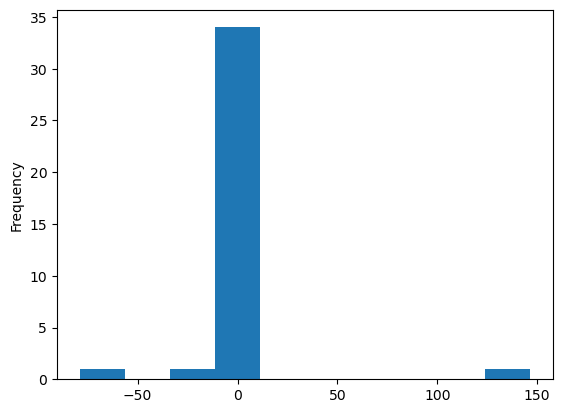

In [18]:
estaciones['Lon'].plot(kind = "hist")
plt.show()

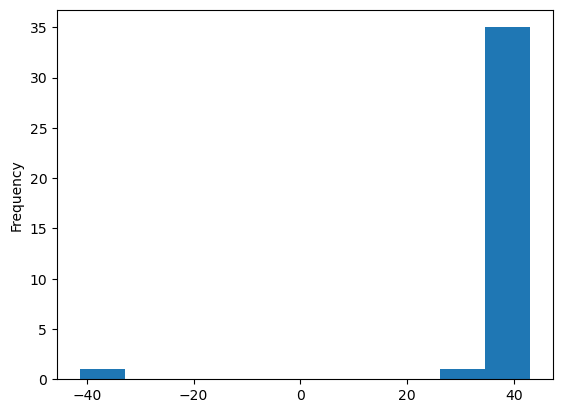

In [20]:
estaciones['Lat'].plot(kind = "hist")
plt.show()

In [22]:
# Eliminamos todas aquellas que no estén dentro de las coordenadas de Madrid

filtro1 = estaciones['Lat'] > 40.
filtro2 = estaciones['Lon'] > -4.

estaciones = estaciones[filtro1 & filtro2]

In [24]:
MADRID_COORDS = [40.4167,  -3.70325]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
        
# convertimos coordenadas a array de dos dimensiones
stationArr = estaciones[['Lat', 'Lon']].values

# ploteamos heatmap
from folium import plugins
m.add_child(plugins.HeatMap(stationArr, radius=25))
m

In [26]:
estaciones.NÚMERO.count()

24

## Representación de contaminación durante el mes de septiembre

Preprocesa y representa los datos de contaminación en Madrid para el mes de septiembre. Tienes los datos cargados en la variable `contamina`.

In [29]:
contamina = pd.read_csv('Data/contamina_2018_09_diario.csv')
contamina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ESTACION  720 non-null    int64  
 1   MAGNITUD  720 non-null    int64  
 2   ANO       720 non-null    int64  
 3   MES       720 non-null    int64  
 4   DIA       720 non-null    int64  
 5   H08       720 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 33.9 KB


In [31]:
contamina.head()

,ESTACION,MAGNITUD,ANO,MES,DIA,H08
0,4,7,2018,9,1,3.0
1,4,7,2018,9,2,3.0
2,4,7,2018,9,3,36.0
3,4,7,2018,9,4,51.0
4,4,7,2018,9,5,10.0


In [33]:
print("Máximo valor de contaminación: {}".format(max(contamina['H08'])))
print("Mínimo valor de contaminación: {}".format(min(contamina['H08'])))

Máximo valor de contaminación: 133.0
Mínimo valor de contaminación: 0.0


In [35]:
contamina['datestr'] = contamina['ANO'].astype(str) +"-"+ contamina['MES'].astype(str) +"-"+ contamina['DIA'].astype(str)
contamina['date'] = contamina.apply(lambda x: pd.to_datetime(x['datestr']), axis=1)
contamina.head()

,ESTACION,MAGNITUD,ANO,MES,DIA,H08,datestr,date
0,4,7,2018,9,1,3.0,2018-9-1,2018-09-01
1,4,7,2018,9,2,3.0,2018-9-2,2018-09-02
2,4,7,2018,9,3,36.0,2018-9-3,2018-09-03
3,4,7,2018,9,4,51.0,2018-9-4,2018-09-04
4,4,7,2018,9,5,10.0,2018-9-5,2018-09-05


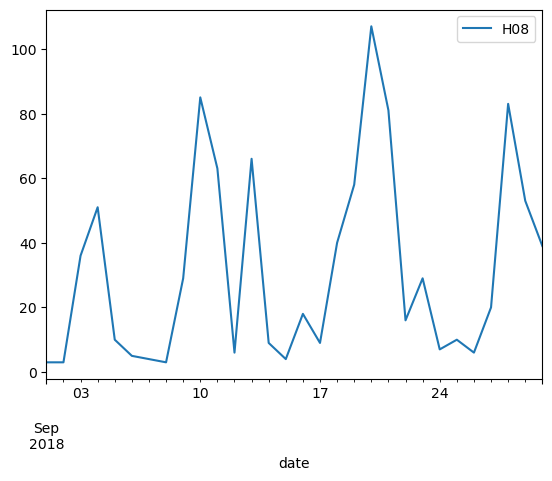

In [37]:
contamina[contamina['ESTACION'] == 4].sort_values(by = "date").plot(x = "date", y= "H08")
plt.show()

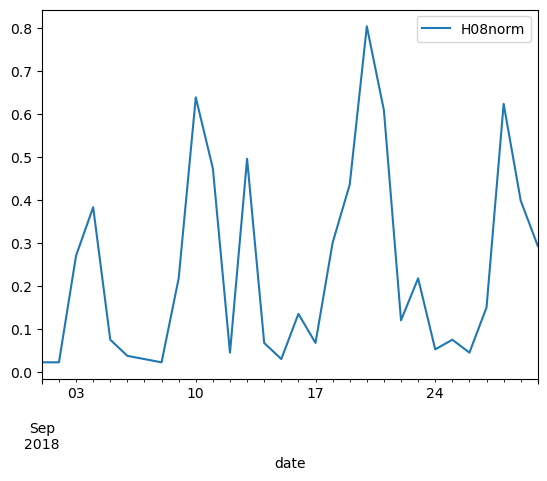

In [39]:
contamina['H08norm'] = contamina['H08'] / max(contamina['H08'])
contamina[contamina['ESTACION'] == 4].sort_values(by = "date").plot(x = "date", y= "H08norm")
plt.show()

In [41]:
estaciones['NÚMERO'] = estaciones['NÚMERO'].astype(int)
merged = estaciones.merge(contamina, how = "inner", left_on = "NÚMERO", right_on = "ESTACION")
merged = merged[["ESTACION", "DIRECCIÓN", "Lon", "Lat", "date", "datestr", "H08norm", "H08"]]
merged.head()

,ESTACION,DIRECCIÓN,Lon,Lat,date,datestr,H08norm,H08
0,4,Plaza de España,-3.712247,40.423853,2018-09-01,2018-9-1,0.022556,3.0
1,4,Plaza de España,-3.712247,40.423853,2018-09-02,2018-9-2,0.022556,3.0
2,4,Plaza de España,-3.712247,40.423853,2018-09-03,2018-9-3,0.270677,36.0
3,4,Plaza de España,-3.712247,40.423853,2018-09-04,2018-9-4,0.383459,51.0
4,4,Plaza de España,-3.712247,40.423853,2018-09-05,2018-9-5,0.075188,10.0


In [43]:
days = merged['date'].unique()

heatmap_data = []
for d in days:
    day_data = [[row['Lat'], row['Lon'], row['H08norm']] for i, row in merged[merged['date'] == d].iterrows()]
    heatmap_data.append(day_data)
    
heatmap_data

[[[40.423852777777775, -3.7122472222222225, 0.022556390977443608],
  [40.42156388888888, -3.6823194444444445, 0.007518796992481203],
  [40.451475, -3.6773555555555553, 0.007518796992481203],
  [40.44004722222222, -3.6392333333333333, 0.007518796992481203],
  [40.34713888888889, -3.713322222222222, 0.007518796992481203],
  [40.394780555555556, -3.7318527777777777, 0.015037593984962405],
  [40.419355555555555, -3.7473472222222224, 0.007518796992481203],
  [40.47692777777778, -3.580030555555555, 0.09774436090225563],
  [40.41920833333333, -3.7031722222222223, 0.015037593984962405],
  [40.40794722222222, -3.6453055555555554, 0.015037593984962405],
  [40.445544444444444, -3.707127777777778, 0.007518796992481203],
  [40.47822777777778, -3.7115416666666667, 0.007518796992481203],
  [40.388152777777776, -3.6515222222222223, 0.015037593984962405],
  [40.398113888888886, -3.6868250000000002, 0.007518796992481203],
  [40.43989722222222, -3.690366666666667, 0.007518796992481203],
  [40.41444444444

In [45]:
MADRID_COORDS = [40.4167,  -3.70325]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)


hm = plugins.HeatMapWithTime(heatmap_data, radius = 60)
hm.add_to(m)
m

Se observa que las ubicaciones con mayor nivel de contaminación son el centro de Madrid y la zona de Barajas. Además, durante los fines de semana, los niveles de contaminación tienden a disminuir, posiblemente porque las personas no utilizan el coche para ir al trabajo ni para llevar a los niños al colegio. 

Por otro lado, hay días puntuales con picos de contaminación, como el 12 de septiembre en la Avda. Betanzos, esquina con C/ Monforte de Lemos, coincidiendo con la festividad en Madrid por la Fiesta de la Virgen de los Santos. Un caso similar ocurre en Usera, en plaza Elíptica, el día 27, probablemente debido a algún evento especial o celebración en esa zona.

## Optimización de rutas

En el worksheet hemos hablado de optimización de rutas como un problema recurrente sobretodo para operaciones logísticas. Lamentablemente, no somos capaces de hacerlo por fuerza bruta en problemas grandes y tampoco sin distancias de ruta por carretera reales. Sin embargo, sí que tenemos la distancia haversine.

Imagina que después de una tormenta eléctrica, todos los dispositivos de medición de contaminación en Madrid se han estropeado y que eres el técnico encargado de repararlos. Si la central del técnico está situada en el punto origen propuesto, construye un algoritmo que calcule la ruta óptima, siendo esta la que más sensores permita reparar en menor tiempo posible y obtén la distancia total recorrida.

Estructura del algoritmo propuesta:
* Establecer punto de origen
* Repetir hasta que no queden puntos por visitar:
    * Calcular desde el punto actual la distancia a todos los puntos restantes.
    * Escoger el punto más cercano.
    * Marcar ese punto como punto ya visitado. No queremos visitar un mismo punto varias veces.
    * Establecer como nuevo punto de origen el seleccionado como más cercano.
* Una vez no queden más puntos por visitar, calcula la distancia de vuelta directamente a la central del técnico.

¿Serías capaz de pintar esta ruta en un mapa de folium?

In [49]:
ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

def haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radio de la tierra en km.
    
    return c * r

In [51]:
def ruta_optima(central, sensores):
    origen = central
    puntos_por_visitar = sensores.copy()
    ruta = []
    distancia_total = 0

    while puntos_por_visitar:
        # Calcular distancias desde el origen a los puntos restantes
        distancias = [
            (haversine(origen[0], origen[1], punto[0], punto[1]), idx)
            for idx, punto in enumerate(puntos_por_visitar)
        ]

        # Escoger el punto más cercano
        distancia_minima, idx_mas_cercano = min(distancias, key=lambda x: x[0])

        # Actualizar distancia total y ruta
        distancia_total += distancia_minima
        ruta.append(puntos_por_visitar[idx_mas_cercano])

        # Marcar el punto como visitado
        origen = puntos_por_visitar.pop(idx_mas_cercano)

    # Volver a la central
    distancia_total += haversine(origen[0], origen[1], central[0], central[1])
    ruta.append(central)

    return ruta, distancia_total

In [53]:
# Extraer las coordenadas de latitud y longitud
locations = list(zip(estaciones['Lat'], estaciones['Lon']))

# Definir la estación central (puede ser cualquier estación, aquí tomamos 'Pza. de España')
central = locations[0]  # Primer estación como central
sensores = locations[1:]  # El resto de las estaciones como sensores

In [55]:
ruta, distancia_total = ruta_optima(central, sensores)

# Imprimir resultados
print(f"Ruta óptima:", ruta)
print(f"\nDistancia total: {distancia_total:.2f} km")

Ruta óptima: [(40.41920833333333, -3.7031722222222223), (40.42156388888888, -3.6823194444444445), (40.41444444444444, -3.682583333333333), (40.398113888888886, -3.6868250000000002), (40.38496388888889, -3.718727777777778), (40.394780555555556, -3.7318527777777777), (40.419355555555555, -3.7473472222222224), (40.445544444444444, -3.707127777777778), (40.43989722222222, -3.690366666666667), (40.451475, -3.6773555555555553), (40.46557222222223, -3.6887694444444445), (40.47822777777778, -3.7115416666666667), (40.50058888888889, -3.6897611111111113), (40.49420833333333, -3.660502777777778), (40.44004722222222, -3.6392333333333333), (40.40794722222222, -3.6453055555555554), (40.388152777777776, -3.6515222222222223), (40.372933333333336, -3.6121166666666666), (40.465250000000005, -3.6090722222222222), (40.46253055555556, -3.580747222222222), (40.47692777777778, -3.580030555555555), (40.34713888888889, -3.713322222222222), (40.51805833333333, -3.774611111111111), (40.423852777777775, -3.712247

In [57]:
ruta

[(40.41920833333333, -3.7031722222222223),
 (40.42156388888888, -3.6823194444444445),
 (40.41444444444444, -3.682583333333333),
 (40.398113888888886, -3.6868250000000002),
 (40.38496388888889, -3.718727777777778),
 (40.394780555555556, -3.7318527777777777),
 (40.419355555555555, -3.7473472222222224),
 (40.445544444444444, -3.707127777777778),
 (40.43989722222222, -3.690366666666667),
 (40.451475, -3.6773555555555553),
 (40.46557222222223, -3.6887694444444445),
 (40.47822777777778, -3.7115416666666667),
 (40.50058888888889, -3.6897611111111113),
 (40.49420833333333, -3.660502777777778),
 (40.44004722222222, -3.6392333333333333),
 (40.40794722222222, -3.6453055555555554),
 (40.388152777777776, -3.6515222222222223),
 (40.372933333333336, -3.6121166666666666),
 (40.465250000000005, -3.6090722222222222),
 (40.46253055555556, -3.580747222222222),
 (40.47692777777778, -3.580030555555555),
 (40.34713888888889, -3.713322222222222),
 (40.51805833333333, -3.774611111111111),
 (40.423852777777775,

In [59]:
import folium

# Crear el mapa centrado en la primera estación de la ruta
map = folium.Map(location=[40.4425, -3.6950], zoom_start=13)

# Dibujar los puntos de la ruta como CircleMarkers
for lat, lon in ruta:
    folium.CircleMarker([lat, lon], radius=2).add_to(map)

# Crear el path con la lista de coordenadas para dibujar la línea
path = []
for i in range(len(ruta)-1):
    path.append([ruta[i], ruta[i+1]])

# Dibujar la ruta como una PolyLine
folium.PolyLine(path, color="blue", weight=2.5, opacity=1).add_to(map)

# Mostrar el mapa
map


Compara ahora tu resultado con el resultado del solver de Gurobi. Recuerda revisar los requerimientos para este problema concreto, en particular: nodos, arcos y distancias.

### Preparando los datos

In [61]:
# Convertimos las coordenadas en listas
locations = list(zip(estaciones["Lat"], estaciones["Lon"]))
names = estaciones["ESTACIÓN"]

In [63]:
# Creamos los nodos
n = len(names)
nodos = [i for i in range(n)]
print("Nodos:", nodos)

Nodos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [65]:
# Creamos los arcos (combinaciones de nodos diferentes)
arcos = [(i, j) for i in nodos for j in nodos if i != j]

# Extraemos las coordenadas de latitud y longitud
X = np.array([cities[0] for cities in locations])
Y = np.array([cities[1] for cities in locations])

# Imprimimos las coordenadas de latitud y longitud
print("Latitudes:", X)
print("Longitudes:", Y)


Latitudes: [40.42385278 40.42156389 40.451475   40.44004722 40.34713889 40.39478056
 40.41935556 40.47692778 40.41920833 40.40794722 40.44554444 40.47822778
 40.38815278 40.39811389 40.43989722 40.41444444 40.46557222 40.37293333
 40.46253056 40.38496389 40.49420833 40.51805833 40.46525    40.50058889]
Longitudes: [-3.71224722 -3.68231944 -3.67735556 -3.63923333 -3.71332222 -3.73185278
 -3.74734722 -3.58003056 -3.70317222 -3.64530556 -3.70712778 -3.71154167
 -3.65152222 -3.686825   -3.69036667 -3.68258333 -3.68876944 -3.61211667
 -3.58074722 -3.71872778 -3.66050278 -3.77461111 -3.60907222 -3.68976111]


In [67]:
#Aprovechamos la distancia de haversine para realizar los cálculos de las Distancias:
distancia = {(i,j): haversine(Y[i],X[i],Y[j],X[j]) for i in nodos for j in nodos if i!=j}

### Resuelve el problema

In [70]:
from gurobipy import *

###### Esta parte de código no sería necesario modificarla ######

#Modelo:
model = Model('TSP')

#variables de decision:
x = model.addVars(arcos, vtype = GRB.BINARY, name='x')
u = model.addVars(nodos, vtype = GRB.CONTINUOUS, name='u')

#funcion objetivo:
model.setObjective(quicksum(distancia[i]*x[i] for i in arcos),GRB.MINIMIZE)

#restricciones
model.addConstrs(quicksum(x[i,j] for j in nodos if j!=i)==1 for i in nodos)
model.addConstrs(quicksum(x[i,j] for i in nodos if j!=i)==1 for j in nodos)

model.addConstrs((x[i,j]==1) >> (u[i]+1==u[j]) for i,j in arcos if j!=0)

#model.Params.timeLimit = 60  ##Estas opciones se utilizan por si el problema es muy grande, limite 60 segundos.
#model.Params.MIPGap = 0.1

#Ejecución de la optimización
model.optimize()

Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M4 Pro
Thread count: 14 physical cores, 14 logical processors, using up to 14 threads

Optimize a model with 48 rows, 576 columns and 1104 nonzeros
Model fingerprint: 0xd3763511
Model has 529 simple general constraints
  529 INDICATOR
Variable types: 24 continuous, 552 integer (552 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 529 rows and 529 columns
Presolve time: 0.00s
Presolved: 577 rows, 1105 columns, 2438 nonzeros
Presolved model has 529 SOS constraint(s)
Variable types: 553 continuous, 552 integer (552 binary)

Root relaxation: objective 6.894308e+01, 58 iterations, 0.00 seconds (0.00 work units)

    Nodes 

### Obten la solución y grafícala

In [73]:
#Imprimir todos los valores
print("Funcion Objetivo: ",str(round(model.ObjVal,2)))
for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(v.x))

Funcion Objetivo:  79.13
x[0,6]=1.0
x[1,15]=1.0
x[2,10]=1.0
x[3,22]=1.0
x[4,17]=1.0
x[5,19]=1.0
x[6,5]=1.0
x[7,20]=1.0
x[8,0]=1.0
x[9,3]=1.0
x[10,14]=1.0
x[11,16]=1.0
x[12,9]=1.0
x[13,8]=1.0
x[14,1]=1.0
x[15,13]=1.0
x[16,2]=1.0
x[17,12]=1.0
x[18,7]=1.0
x[19,4]=1.0
x[20,23]=1.0
x[21,11]=1.0
x[22,18]=1.0
x[23,21]=1.0
u[1]=20.0
u[2]=17.0
u[3]=8.0
u[4]=4.0
u[5]=2.0
u[6]=1.0
u[7]=11.0
u[8]=23.0
u[9]=7.0
u[10]=18.0
u[11]=15.0
u[12]=6.0
u[13]=22.0
u[14]=19.0
u[15]=21.0
u[16]=16.0
u[17]=5.0
u[18]=10.0
u[19]=3.0
u[20]=12.0
u[21]=14.0
u[22]=9.0
u[23]=13.0


In [75]:
#Arcos activos:
arcos_activos = [i for i in arcos if x[i].x>0.9]
print(arcos_activos)

[(0, 6), (1, 15), (2, 10), (3, 22), (4, 17), (5, 19), (6, 5), (7, 20), (8, 0), (9, 3), (10, 14), (11, 16), (12, 9), (13, 8), (14, 1), (15, 13), (16, 2), (17, 12), (18, 7), (19, 4), (20, 23), (21, 11), (22, 18), (23, 21)]


¿Serías capaz de mostrarla en folium para comparar?

In [78]:
import folium

map = folium.Map(location = [40.4425, -3.6950], zoom_start = 6)

for n in range(len(X)):
    folium.CircleMarker([X[n],Y[n]],radius=2).add_to(map)

path = []
for v,w in enumerate(arcos_activos):
    path.append([[X[w[0]],Y[w[0]]],[X[w[1]],Y[w[1]]]])

folium.PolyLine(path).add_to(map)

map

### Compara los resultados. Como lo valoras?

La técnica de ir yendo y orientándose hacia el siguiente destino basándose en los puntos más cercanos parecía una estrategia válida al principio, pero al observar el mapa, se puede notar que el algoritmo no gestiona adecuadamente los últimos puntos. Esto genera un recorrido innecesariamente largo, incrementando de manera significativa la distancia total. Este enfoque, aunque simple, no ha demostrado ser eficiente para la planificación de rutas, ya que no tiene en cuenta la optimización global de la distancia.

En contraste, el método de optimización utilizando Gurobi resulta ser mucho más efectivo, ya que este algoritmo tiene en cuenta todos los puntos del itinerario desde el inicio, buscando la combinación óptima que minimiza la distancia total recorrida. Con esta técnica se permite encontrar la ruta más corta posible sin la necesidad de recorrer distancias excesivas.